In [4]:
import numpy as np # biblioteca numpy para fazer caluclos matematicos
from sklearn.model_selection import train_test_split #importa da sklearn.model a biblioteca train test split, esta biblioteca serve
#para dividir os dados teste e treino
from sklearn.tree import DecisionTreeClassifier # vai importar o algoritimo  da arvore de decisão
from sklearn import tree # importa a biblioteca para plotar a arvore de decisão
import matplotlib.pyplot as plt # importa a biblioteca matplotlib 
import seaborn as sns # importa a biblioteca seaborn
from sklearn.metrics import accuracy_score # metrica de acuracia do algoritimo
from sklearn.metrics import precision_score # métrica de precisão de algoritimo
from sklearn.metrics import recall_score #métrica de recall do algoritimo
from sklearn.metrics import f1_score # métrica de f1 score
import pandas as pd #importa a bibioteca pandas

In [5]:
df = pd.read_csv("C:/Users/dsadm/Desktop/Codigos_IABD2024/Formativa/dados_produtos.csv") #importa a o dados

In [6]:
df.head() # exibe as 4 primeiras linhas do Dataframe

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [7]:
#Obtendo informações do dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [8]:
df.describe() #Análise estatistica

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [9]:
x = df["product_name"]
y = df["rating"]

<Axes: title={'center': 'Box plot das notas'}, xlabel='product_name', ylabel='rating'>

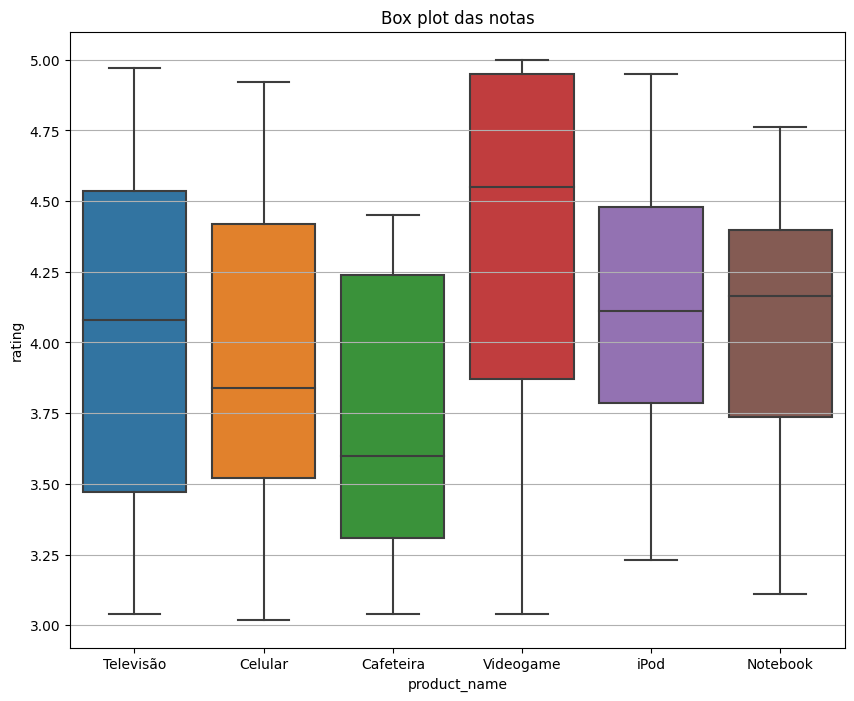

In [13]:

plt.figure(figsize=(10,8))
plt.grid()
plt.title('Box plot das notas')
sns.boxplot (x=x, y=y)

In [100]:
x = df[['rating','rating_count']]
y = df['purchased']

In [102]:
#Dividir dados em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split (x,
                                                        y,
                                                         test_size=0.2,
                                                         random_state=42)

In [ ]:
#Treinamento do modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino, y_treino)

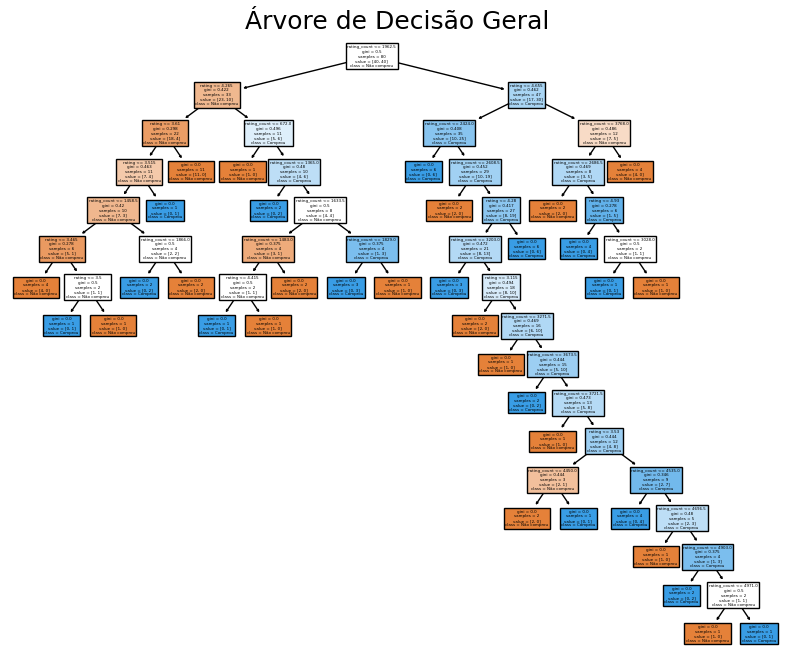

In [108]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Geral', fontsize=18)
plt.show()

In [109]:
#Separando os dados da Televisão
xtv=df.loc[df['product_name'] == 'Televisão', ['rating','rating_count']]
ytv = df.loc[df['product_name'] == 'Televisão', 'purchased']

In [114]:
#Dividindo os dados em treino e teste
Xtv_treino, Xtv_teste, ytv_treino, ytv_teste = train_test_split (xtv,
                                                        ytv,
                                                         test_size=0.2,
                                                         random_state=42)

In [113]:
#Treinamento do modelo
modelo_tv = DecisionTreeClassifier()
modelo_tv.fit(X_treino, y_treino)

DecisionTreeClassifier()

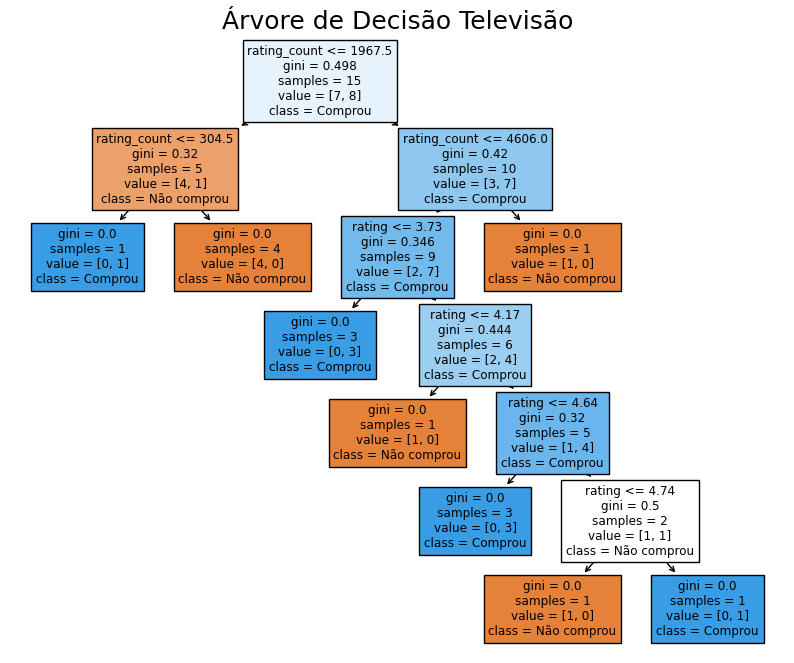

In [115]:
#Arvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(modelo_tv, 
               feature_names=['rating','rating_count'], 
               class_names=['Não comprou', 'Comprou'],
               filled=True)
plt.title('Árvore de Decisão Televisão', fontsize=18)
plt.show()